In [1]:
import torch
from torch import nn
# from d2l import torch as d2l

import sys

sys.path.append("..")
import d2lzh_pytorch.torch as d2l

import d2lzh_pytorch.load_chinese_txt_data as load_chinese  # 加载中文训练数据
import d2lzh_pytorch.rnn_train_chinese as train_chinese  # 加载训练模块
from d2lzh_pytorch.rnn_model import RNNModel  # 加载RNN模型

device = d2l.try_gpu()

In [2]:
batch_size, num_steps = 32, 35



# 加载数据
# train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
txtPath = "/mnt/g2t/ai_data/txtBook/贾平凹-山本.txt"
stopwords_file = "/mnt/g2t/ai_data/txtBook/stopwords.txt"
train_iter, vocab = load_chinese.load_data_time_machine(batch_size,
                                                        num_steps,
                                                        txtPath,
                                                        stopwords_file)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.238 seconds.
Prefix dict has been built successfully.


load vocabulary success. len(vocab): 3577


In [3]:
vocab_size = len(vocab)
num_hiddens = 256
num_layers = 3
num_inputs = vocab_size


lstm_layer = nn.LSTM(num_inputs, 
                     num_hiddens, 
                     num_layers, 
                     bidirectional=True
                    )

# 模型定义
model = RNNModel(lstm_layer,
                 len(vocab)
                )


# model_save_path = 'bidirectional_LSTM_RNN_4_23.pt'
# model.load_state_dict(torch.load(model_save_path))


model = model.to(device)

In [4]:
model

RNNModel(
  (rnn): LSTM(3577, 256, num_layers=3, bidirectional=True)
  (linear): Linear(in_features=512, out_features=3577, bias=True)
)

Time consuming:  90.8768 秒
perplexity 544.0, 102553.6 tokens/sec on cuda:0
井掌柜000说说说说说说说说说说0000000000000000000000000000000000000


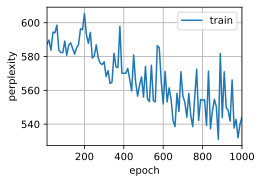

In [6]:
# 训练
num_epochs = 1000
lr = 0.1


train_chinese.train_ch8(model,
                        train_iter,
                        vocab,
                        lr * 1.0,
                        num_epochs,
                        device)

In [7]:
# 预测
train_chinese.predict_ch8('陆菊人', 20,
                          model, vocab, device
                         )

'陆菊人000说说说说说说说说说说0000000'

In [ ]:
# 模型保存

model_save_path = 'deep_LSTM_RNN_4_23.pt'

# 保存训练的模型
torch.save(model.state_dict(),  model_save_path)  # 推荐的文件后缀名是pt或pth